In [1]:
#import package

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statannot import add_stat_annotation
from matplotlib.patches import Wedge
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [3]:
plt.rc('font',family='Arial') 

### Fig. 1A

In [4]:
dd=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\for_barplot.tsv",sep="\t")

Text(0.5, 0, 'Samples')

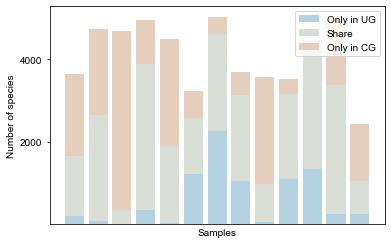

In [5]:
plt.bar(dd[dd.Type=="Only in UG"]["People"],dd[dd.Type=="Only in UG"]["Values"],align="center",label="Only in UG",color="#b5d2e2")
plt.bar(dd[dd.Type=="Share"]["People"],dd[dd.Type=="Share"]["Values"],align="center",bottom=dd[dd.Type=="Only in UG"]["Values"],label="Share",color="#d8ded6")
plt.bar(dd[dd.Type=="Only in CG"]["People"],dd[dd.Type=="Only in CG"]["Values"],align="center",bottom=[x+y for x,y in zip(dd[dd.Type=="Only in UG"]["Values"],dd[dd.Type=="Share"]["Values"])],label="Only in CG",color="#e6cebc")
plt.legend()
plt.xticks([])
plt.yticks([2000,4000])
plt.ylabel("Number of species")
plt.xlabel("Samples")
# plt.savefig("kraken2_CG_UG_share.pdf")

### Fig. 1D

In [6]:
bin_650=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Table S3.csv")

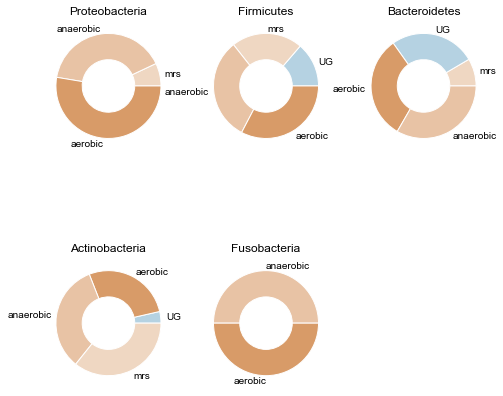

In [7]:
# revise the tax annotion

bin_650["Phylum"]=bin_650["Phylum"].map({"p__Firmicutes_A":"Firmicutes","p__Firmicutes_C":"Firmicutes","p__Firmicutes":"Firmicutes",
                      "p__Bacteroidota":"Bacteroidetes","p__Actinobacteriota":"Actinobacteria","p__Fusobacteriota":"Fusobacteria",
                                        "p__Proteobacteria":"Proteobacteria"})

bin_650["Culture4"]=bin_650["Culture"].map({"mrs-24h":"mrs","mrs-12h":"mrs","aerobic-12h":"aerobic","aerobic-24h":"aerobic",
                        "anaerobic-12h":"anaerobic","anaerobic-24h":"anaerobic","unculture":"UG"})

plot_data=bin_650[["cMECOS-MAG-ID","Phylum","Culture4"]]

colors={"UG":"#b5d2e2","aerobic":"#d89b68","anaerobic":"#e8c3a5","mrs":"#efd7c2"}

fig=plt.figure(figsize=[8,8])

for i,x in enumerate(plot_data["Phylum"].unique()):
    ax=fig.add_subplot(2,3,i+1)
    Phy=x
    names=plot_data[plot_data["Phylum"]==Phy]["Culture4"].value_counts().sort_values().index.tolist()
    size=plot_data[plot_data["Phylum"]==Phy]["Culture4"].value_counts().sort_values().tolist()
    cc=[colors[i]  for i in names] 

    plt.pie(size, labels=names,wedgeprops=dict(width=0.5, edgecolor='w'),colors=cc)
    plt.title(Phy)
# fig.savefig("fig1_pie.pdf")

In [8]:
#Load metadata  
metadata=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Table S2.csv")

#Load the data contained speciesID, total length and SequenceID
sam_with_lev=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Total contig length sample speices.tsv",sep="\t")

sam_with_lev["taxid"]=sam_with_lev["taxid"].astype("str")

sp_725_name=sam_with_lev["taxid"].unique().astype("str").tolist()

def add2_725sp(T,P,sp_name):
    import pandas as pd
    ID_=metadata[(metadata.People==P) & (metadata.Culture_type==T)]["ID"].tolist()[0]
    x=sam_with_lev[sam_with_lev["Sample_ID"]==ID_].groupby("taxid").sum()["length"]
    y=[]
    z=[]
    for i in sp_name:
        z.append(i)
        if i in x.index:
            y.append(x[i])
        else:
            y.append(0)
    r=pd.DataFrame([z,y],index=["SP_name","contig_sum_len"]).T
    r["Type"]=T
    r["People"]=P
    r.index=r["SP_name"]

    return r

def get_sp_name(P):
    import pandas as pd
    ID_=metadata[(metadata.People==P)]["ID"].tolist()[0]
    x=sam_with_lev[sam_with_lev["Sample_ID"]==ID_].groupby("Species").sum()["length"]
    return x.index.tolist()

def tr_zero(x):
    if x==0:
        return np.nan
    else:
       

SyntaxError: unexpected EOF while parsing (<ipython-input-8-52cd94f82e4d>, line 40)

In [9]:
#Load metadata  
metadata=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Table S2.csv")

#Load the data contained speciesID, total length and SequenceID
sam_with_lev=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Total contig length sample speices.tsv",sep="\t")

sam_with_lev["taxid"]=sam_with_lev["taxid"].astype("str")

sp_725_name=sam_with_lev["taxid"].unique().astype("str").tolist()

In [10]:
def add2_725sp(T,P,sp_name):
    import pandas as pd
    ID_=metadata[(metadata.People==P) & (metadata.Culture_type==T)]["ID"].tolist()[0]
    x=sam_with_lev[sam_with_lev["Sample_ID"]==ID_].groupby("taxid").sum()["length"]
    y=[]
    z=[]
    for i in sp_name:
        z.append(i)
        if i in x.index:
            y.append(x[i])
        else:
            y.append(0)
    r=pd.DataFrame([z,y],index=["SP_name","contig_sum_len"]).T
    r["Type"]=T
    r["People"]=P
    r.index=r["SP_name"]

    return r

def get_sp_name(P):
    import pandas as pd
    ID_=metadata[(metadata.People==P)]["ID"].tolist()[0]
    x=sam_with_lev[sam_with_lev["Sample_ID"]==ID_].groupby("Species").sum()["length"]
    return x.index.tolist()

def tr_zero(x):
    if x==0:
        return np.nan
    else:
        return x

### Fig. 2A

In [11]:


def add_sp_type(T,sp_name):
    '''
    Enter the culture type, and the ID of the species, and return a Dataframe with two columns, the first column for culture type and the second column for total contig length
    '''
    import pandas as pd
    ID_=metadata[metadata.Culture==T]["SequenceID"].tolist()
    x=sam_with_lev[sam_with_lev["Sample_ID"].isin(ID_)].groupby("taxid").sum()["length"]
    y=[]
    z=[]
    for i in sp_name:
        z.append(i)
        if i in x.index:
            y.append(x[i])
        else:
            y.append(0)
    r=pd.DataFrame([z,y],index=["SP_name","contig_sum_len"]).T
    r["Type"]=T
    r.index=r["SP_name"]
    return r

def log_sp_cMECOS():
    """
    Running this function returns the log10 of the CG group (all culture conditions combined),UG group, and cMECOS considering the total contig length
    """
    x=add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["SP_name"]
    y=(add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["contig_sum_len"]+1)
    
    y_a12=(add_sp_type("aerobic-12h",sp_725_name,).loc[x]["contig_sum_len"]+1)
    y_a24=(add_sp_type("aerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana12=(add_sp_type("anaerobic-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana24=(add_sp_type("anaerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs12=(add_sp_type("mrs-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs24=(add_sp_type("mrs-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    z1=pd.concat([y_a12,y_a24,y_ana12,y_ana24,y_mrs12,y_mrs24],axis=1).sum(axis=1).map(np.log10).fillna(0)
    z2=pd.concat([y],axis=1).sum(axis=1).map(np.log10).fillna(0)
    z3=pd.concat([y_a12,y_a24,y_ana12,y_ana24,y_mrs12,y_mrs24,y],axis=1).sum(axis=1).map(np.log10).fillna(0)
    DDD=pd.concat([z1,z2,z3],axis=1)
    DDD.columns=["CG","UG","cMECOS"]
    return DDD

def logFC_all_people_cg_vs_ug():
    """
    Running this function returns logFC of the total contig length added to the CG group (all culture conditions together) compared to the UG group
    """
    x=add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["SP_name"]
    y=(add_sp_type("unculture",sp_725_name).sort_values("contig_sum_len",ascending=False)["contig_sum_len"]+1)
    
    y_a12=(add_sp_type("aerobic-12h",sp_725_name,).loc[x]["contig_sum_len"]+1)
    y_a24=(add_sp_type("aerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana12=(add_sp_type("anaerobic-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_ana24=(add_sp_type("anaerobic-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs12=(add_sp_type("mrs-12h",sp_725_name).loc[x]["contig_sum_len"]+1)
    y_mrs24=(add_sp_type("mrs-24h",sp_725_name).loc[x]["contig_sum_len"]+1)
    z=pd.concat([y_a12,y_a24,y_ana12,y_ana24,y_mrs12,y_mrs24],axis=1).sum(axis=1).map(np.log10).fillna(0)-y.map(np.log10).fillna(0)
    return z

In [12]:
FC_PLOT2=pd.DataFrame(logFC_all_people_cg_vs_ug())
FC_PLOT2.columns=["value"]

FC_PLOT2["variable"]=FC_PLOT2.index

up_sor_index=FC_PLOT2[FC_PLOT2["value"]>0].sort_values("value",ascending=False).index

down_sor_index=FC_PLOT2[FC_PLOT2["value"]<0].sort_values("value",ascending=False).index

sort_plot_index=up_sor_index.tolist()+down_sor_index.tolist()

FC_PLOT2=FC_PLOT2.loc[sort_plot_index]

data_PLOT3=log_sp_cMECOS().loc[sort_plot_index]

up_index=data_PLOT3[data_PLOT3["UG"]<=0].sort_values("CG",ascending=False).index

ttt=data_PLOT3[data_PLOT3["CG"]-data_PLOT3["UG"]<0]

ttt["lgFC"]=ttt["CG"]-ttt["UG"]

down_index=ttt.sort_values("lgFC",ascending=False).index

mid_index=FC_PLOT2.loc[list(set(data_PLOT3.index.tolist())-set(up_index.tolist())-set(down_index.tolist()))].sort_values("value",ascending=False).index

all_index=up_index.to_list()+mid_index.to_list()+down_index.to_list()

data_PLOT4=data_PLOT3.loc[all_index]

up_index_FC=[i for i in all_index if i in FC_PLOT2[FC_PLOT2["value"]>0].index]

down_index_FC=[i for i in all_index if i in FC_PLOT2[FC_PLOT2["value"]<0].index]

<ipython-input-12-6d36ccbdbf84>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttt["lgFC"]=ttt["CG"]-ttt["UG"]


In [13]:
len(up_index_FC+down_index_FC)

725

In [14]:
725-len(down_index)

653

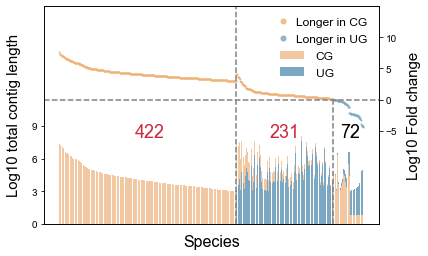

In [15]:
data_PLOT4.index=data_PLOT4.index.astype("str")

fig=plt.figure(figsize=[6,4])
ax=fig.add_subplot()

ax.bar(data_PLOT4.index,data_PLOT4["CG"],label="CG",color="#f1c8a2")
ax.bar(data_PLOT4.index,data_PLOT4["UG"],label="UG",alpha=1,color="#7ca7c3")
ax.bar(data_PLOT4.loc[down_index].index,data_PLOT4.loc[down_index]["CG"],color="#f1c8a2")
plt.text(180,8,422,size=18,color="#cb2d40")
plt.text(500,8,231,size=18,color="#cb2d40")
plt.text(670,8,72,size=18)

plt.ylim([0,20])
ax2=ax.twinx()
ax2.plot(FC_PLOT2.loc[up_index_FC]["variable"],FC_PLOT2.loc[up_index_FC]["value"],"o",markersize=1,alpha=0.8,label="Longer in CG",color="#efb275")
ax2.plot(FC_PLOT2.loc[down_index_FC]["variable"],FC_PLOT2.loc[down_index_FC]["value"],"o",markersize=1,alpha=0.8,label="Longer in UG",color="#7ca7c3")
plt.ylim([-20,15])
ax.set_xticks([])
ax.set_ylabel("Log10 total contig length",size=15,labelpad=10)
ax2.set_ylabel("Log10 Fold change",size=15,labelpad=10)
ax.set_xlabel("Species",size=16,labelpad=10)
plt.axhline(0,ls="--",color="grey")
plt.axvline(422,ls="--",color="grey")
plt.vlines(653,ymax=0,ymin=-20,ls="--",color="grey")
ax.set_yticks([0,3,6,9])
ax2.set_yticks([-5,0,5,10])
ax2.legend(frameon=False,fontsize=12,handletextpad=0.1,markerscale=5)
ax.legend(frameon=False,fontsize=12,loc=[0.69,0.65],handletextpad=1)

# fig.savefig("725总长_CGvsUG.pdf")

### Fig. 2B

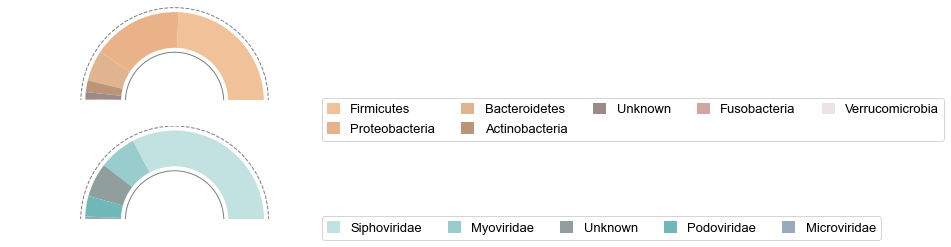

In [16]:
#Load the Speceies ID to tax level
SPID2lev=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\taxID2nam.txt",sep=";",index_col=0)

up_mid_SP=SPID2lev.loc[[int(i) for i in mid_index.to_list()+up_index.to_list()]]

PHY_BAC=up_mid_SP[up_mid_SP["Kingdom"]=='Bacteria'].groupby("Phylum").count().sort_values("Species",ascending=False)["Species"]

FAM_VIR=up_mid_SP[up_mid_SP["Kingdom"]=='Viruses'].groupby("Family").count().sort_values("Species",ascending=False)["Species"]

fig=plt.figure()
ax=fig.add_subplot(211)
#Bacteria
data=[i/(PHY_BAC.sum()*2) for i in PHY_BAC]
series = pd.Series(data)
label = PHY_BAC.index.tolist()
colors = ["#f1c299","#eab288","#dfb48e","#bc9477","#9b8a8a","#d1a6a1","#ece4e4"]
patches,l_text =plt.pie(series, colors = colors,
                wedgeprops = dict(width = 0.4),
                startangle = 0,
                textprops = dict(fontsize = 15),
                normalize=False
                     )

semicircle=Wedge((0,0),1.05,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='--')
ax.add_artist(semicircle)  
plt.axis('equal') 
semicircle=Wedge((0,0),0.55,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='-')
ax.add_artist(semicircle) 
plt.axis('equal')
x = [-1.05,1.05]
y = [0,0]
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)

plt.legend(patches, label, loc=0, ncol = 5, fontsize = 13, bbox_to_anchor=(0.92, 0.15),handlelength=1, handleheight=1)

#Viruses
data=[i/(FAM_VIR.sum()*2) for i in FAM_VIR]
series = pd.Series(data)
label = FAM_VIR.index.tolist()
colors =["#c2e1e1","#99cccc","#909e9d","#71b8b8","#95aabc"]
ax =fig.add_subplot(212)
patches,l_text =plt.pie(series, colors = colors,
                wedgeprops = dict(width = 0.4),
                startangle = 0,
                textprops = dict(fontsize = 15),
                normalize=False
                     )
semicircle=Wedge((0,0),1.05,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='--')
ax.add_artist(semicircle) 
plt.axis('equal') 
semicircle=Wedge((0,0),0.55,0,180, edgecolor = 'grey', facecolor = 'None', linestyle='-')
ax.add_artist(semicircle) 
plt.axis('equal')
x = [-1.05,1.05]
y = [0,0]
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)
plt.plot(x, y,color='white',alpha=1)

plt.legend(patches, label, loc=0, ncol = 5, fontsize = 13, bbox_to_anchor=(0.92, 0.15),handlelength=1, handleheight=1)

### Fig. 2C

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Bacteroidetes_UG v.s. Bacteroidetes_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.437e-02 U_stat=2.433e+03
Firmicutes_UG v.s. Firmicutes_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.974e-35 U_stat=1.928e+04
Actinobacteria_UG v.s. Actinobacteria_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.097e-03 U_stat=1.380e+02
Proteobacteria_UG v.s. Proteobacteria_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.232e-60 U_stat=1.236e+03
Fusobacteria_UG v.s. Fusobacteria_cMECOS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.054e-01 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p

<ipython-input-17-9a1d62450e1b>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cMECOS_N50_with_lev_BAC["Type"]="cMECOS"
<ipython-input-17-9a1d62450e1b>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UG_N50_with_lev_BAC["Type"]="UG"
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has

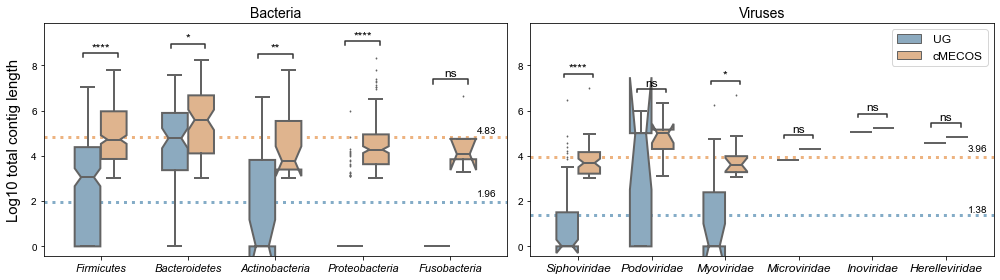

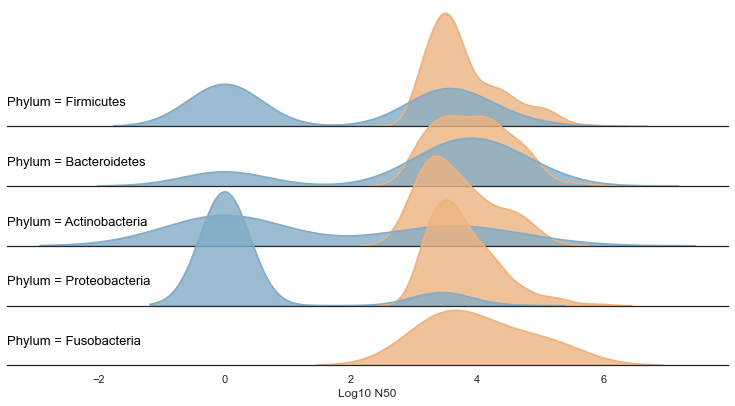

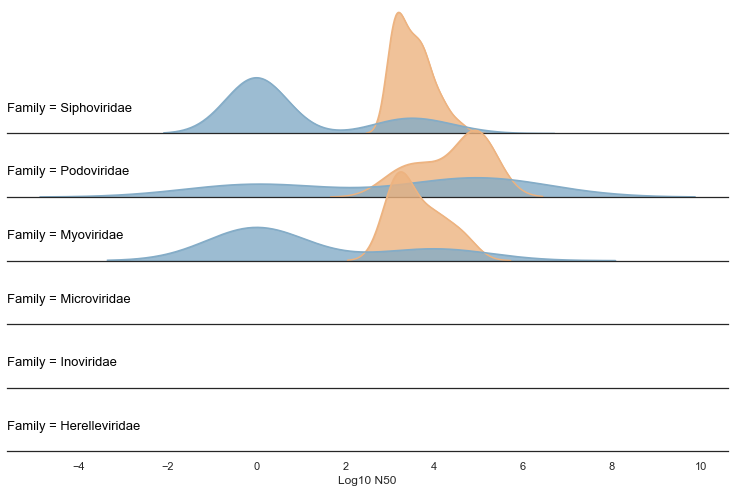

In [17]:
data_PLOT4.index=data_PLOT4.index.astype(int)

for_box_plot_data=pd.merge(data_PLOT4,SPID2lev,left_index=True,right_index=True)

box_plot_bac=for_box_plot_data[for_box_plot_data["Kingdom"]=="Bacteria"][["UG","cMECOS","Phylum"]].melt("Phylum")

box_plot_bac=box_plot_bac[box_plot_bac["Phylum"]!="Unknown"]

box_plot_vir=for_box_plot_data[for_box_plot_data["Kingdom"]=="Viruses"][["UG","cMECOS","Family"]].melt("Family")

box_plot_vir=box_plot_vir[box_plot_vir["Family"]!="Unknown"]

# Count the original total contig length in two groups

add_origin_num_bac=box_plot_bac.copy()

add_origin_num_bac["origin"]=[10**i -1 for i in box_plot_bac.value]

add_origin_num_vir=box_plot_vir.copy()

add_origin_num_vir["origin"]=[10**i -1 for i in box_plot_vir.value]

add_origin_num_bac.groupby("variable").mean()

add_origin_num_vir.groupby("variable").mean()

## Only the top five data, bacteria and viruses are the top five; Viruses are the same as the last five

box_plot_bac=box_plot_bac[box_plot_bac.Phylum.isin(["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"])]

fig=plt.figure(figsize=[14,4])
ax=fig.add_subplot(121)
plt.axhline(box_plot_bac[box_plot_bac["variable"]=="cMECOS"].mean().tolist()[0],ls=":",linewidth=3,color="#edb380",zorder=-1)
plt.axhline(box_plot_bac[box_plot_bac["variable"]=="UG"].mean().tolist()[0],ls=":",linewidth=3,color="#84acc7",zorder=-1)
v1=sns.boxplot(x="Phylum",y="value",hue="variable",order=["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"],palette=["#84acc7","#edb380"] ,linewidth=2,notch=True,data=box_plot_bac,fliersize=1,width=0.6,ax=ax)
add_stat_annotation(v1,data=box_plot_bac,x="Phylum",y="value",order=["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"],hue="variable",
                    box_pairs=[ (("Firmicutes", "UG"),("Firmicutes", "cMECOS")),
                               (("Proteobacteria", "UG"),("Proteobacteria", "cMECOS")),
                               (("Fusobacteria", "UG"),("Fusobacteria", "cMECOS")),
                              (("Actinobacteria", "UG"),("Actinobacteria", "cMECOS")),
                              (("Bacteroidetes", "UG"),("Bacteroidetes", "cMECOS"))
                              ],test="Mann-Whitney",text_format='star', loc='inside',fontsize=12)
ax.set_ylabel("Log10 total contig length",size=15,labelpad=10)
ax.set_xlabel("",size=15,labelpad=10)
ax.get_legend().remove()
plt.xticks(size=11,style="italic")

plt.text(4.3,5,4.83)
plt.text(4.3,2.2,1.96)


ax2=fig.add_subplot(122)
plt.axhline(box_plot_vir[box_plot_vir["variable"]=="cMECOS"].mean().tolist()[0],ls=":",linewidth=3,color="#edb380",zorder=-1)
plt.axhline(box_plot_vir[box_plot_vir["variable"]=="UG"].mean().tolist()[0],ls=":",linewidth=3,color="#84acc7",zorder=-1)
v2=sns.boxplot(x="Family",y="value",order=["Siphoviridae","Podoviridae","Myoviridae","Microviridae","Inoviridae","Herelleviridae"],hue="variable",palette=["#84acc7","#edb380"] ,linewidth=2,notch=True,data=box_plot_vir,fliersize=1,width=0.6,ax=ax2)
add_stat_annotation(v2,data=box_plot_vir,x="Family",y="value",order=["Siphoviridae","Podoviridae","Myoviridae","Microviridae","Inoviridae","Herelleviridae"],hue="variable",
                    box_pairs=[ (("Siphoviridae", "UG"),("Siphoviridae", "cMECOS")),
                               (("Myoviridae", "UG"),("Myoviridae", "cMECOS")),
                               (("Podoviridae", "UG"),("Podoviridae", "cMECOS")),
                              (("Microviridae", "UG"),("Microviridae", "cMECOS")),
                              (("Herelleviridae", "UG"),("Herelleviridae", "cMECOS")),
                              (("Inoviridae", "UG"),("Inoviridae", "cMECOS"))],test="Mann-Whitney",text_format='star', loc='inside',fontsize=12)
ax2.set_ylabel("",size=15,labelpad=10)
ax2.set_xlabel("",size=15,labelpad=10)
ax2.legend(shadow=False,fontsize=12,handletextpad=1)
plt.xticks(size=12,style="italic")

plt.text(5.3,4.2,3.96)
plt.text(5.3,1.5,1.38)
ax2.set_yticks([0,2,4,6,8])
ax2.set_ylim(ax.get_ylim())
ax.set_title("Bacteria",size=14)
ax2.set_title("Viruses",size=14)
fig.tight_layout()
# fig.savefig("BACandVIR_total_contig_len_inUGandcMECOS.pdf")

#Load N50 

UG_N50=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\UG_all_people_contigs_bySP_stat.csv")

cMECOS_N50=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\cMECOS_all_people_contigs_bySP_stat.csv")

sam_with_lev

cMECOS_N50_with_lev=pd.merge(cMECOS_N50,SPID2lev,left_on="taxid",right_index=True)
cMECOS_N50_with_lev_BAC=cMECOS_N50_with_lev[cMECOS_N50_with_lev["Kingdom"]=="Bacteria"]
cMECOS_N50_with_lev_VIR=cMECOS_N50_with_lev[cMECOS_N50_with_lev["Kingdom"]=="Viruses"]
UG_N50_with_lev=pd.merge(UG_N50,SPID2lev,left_on="taxid",right_index=True)
UG_N50_with_lev_BAC=UG_N50_with_lev[UG_N50_with_lev["Kingdom"]=="Bacteria"]
UG_N50_with_lev_VIR=UG_N50_with_lev[UG_N50_with_lev["Kingdom"]=="Viruses"]

cMECOS_N50_with_lev_BAC["Type"]="cMECOS"

UG_N50_with_lev_BAC["Type"]="UG"

UGandcMECOS_BAC_for_plot=pd.concat([UG_N50_with_lev_BAC,cMECOS_N50_with_lev_BAC])

UGandcMECOS_BAC_for_plot=UGandcMECOS_BAC_for_plot[UGandcMECOS_BAC_for_plot["Phylum"]!="Unknown"]

UGandcMECOS_BAC_for_plot["log10_N50"]=UGandcMECOS_BAC_for_plot["N50"].map(lambda x:np.log10(x+1))

#Only remian the top 5

UGandcMECOS_BAC_for_plot=UGandcMECOS_BAC_for_plot[UGandcMECOS_BAC_for_plot["Phylum"].isin(["Firmicutes","Bacteroidetes","Actinobacteria","Proteobacteria","Fusobacteria"])]

sns.set_theme(style="white",rc={"axes.facecolor":(0,0,0,0)})
g=sns.FacetGrid(UGandcMECOS_BAC_for_plot,row="Phylum",aspect=9,height=1.2)
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",fill=True,alpha=0.8,palette=["#84acc7","#edb380"])
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",color="black",palette=["#84acc7","#edb380"])

def ss_label(x,color):
    ax = plt.gca()
    ax.text(0, .2, ax.get_title(), color="black", fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(ss_label, "Phylum")
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")

g.set(yticks=[],xlabel="Log10 N50")
g.despine(left=True)
# plt.savefig("BAC_kde.pdf")

cMECOS_N50_with_lev_VIR["Type"]="cMECOS"
UG_N50_with_lev_VIR["Type"]="UG"
UGandcMECOS_VIR_for_plot=pd.concat([UG_N50_with_lev_VIR,cMECOS_N50_with_lev_VIR])
UGandcMECOS_VIR_for_plot=UGandcMECOS_VIR_for_plot[UGandcMECOS_VIR_for_plot["Family"]!="Unknown"]
UGandcMECOS_VIR_for_plot["log10_N50"]=UGandcMECOS_VIR_for_plot["N50"].map(lambda x:np.log10(x+1))

sns.set_theme(style="white",rc={"axes.facecolor":(0,0,0,0)})
g=sns.FacetGrid(UGandcMECOS_VIR_for_plot,row="Family",aspect=9,height=1.2)
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",fill=True,alpha=0.8,palette=["#84acc7","#edb380"])
g.map_dataframe(sns.kdeplot,x="log10_N50",hue="Type",color="black",palette=["#84acc7","#edb380"])
def ss_label(x,color):
    ax = plt.gca()
    ax.text(0, .2, ax.get_title(), color="black", fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(ss_label, "Phylum")
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")

g.set(yticks=[],xlabel="Log10 N50")
g.despine(left=True)
# plt.savefig("Vir_kde.pdf")

### Fig. 2E

In [18]:
merge_data=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Each species non-genes num UG cMECOS.csv",index_col=0)

D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\local\software\Anaoconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


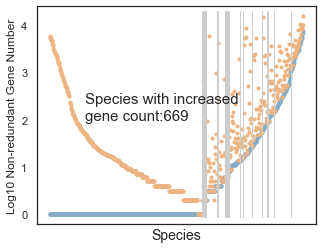

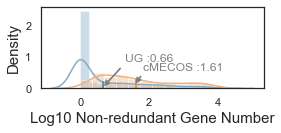

In [20]:
sort_index_1=merge_data[merge_data["UG"]==0].sort_values("cMECOS",ascending=False).index.tolist()

sort_index_2=merge_data[merge_data["UG"]!=0].sort_values("UG").index.tolist()

merge_data["addition"]=np.abs(merge_data["cMECOS"]-merge_data["UG"])

merge_data=merge_data.loc[sort_index_1+sort_index_2]

merge_data["cMECOS"].mean()

addition=pd.DataFrame(merge_data["cMECOS"]-merge_data["UG"])

merge_data["rank"]=range(len(merge_data))

fig=plt.figure(figsize=[5,4])
ax=fig.add_subplot()
ax.plot([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["UG"].tolist()],'.',label="UG",color="#84acc7")
ax.plot([np.log10(j+1) for j in merge_data[["UG","cMECOS"]]["cMECOS"].tolist()],'.',label="cMECOS",color="#edb380")
for i in merge_data[(merge_data["cMECOS"]-merge_data["UG"]<=0)&merge_data["UG"] > 0 ]["rank"]:
    ax.axvline(i,ls="-",color="#cdcdcd",lw=1,ymin=0.03,ymax=0.98)
ax.set_yticks([0,1,2,3,4])
ax.set_xticks([])
ax.set_ylabel("Log10 Non-redundant Gene Number",size=12)
ax.set_xlabel("Species",size=14)
plt.text(100,2,"Species with increased\ngene count:{}".format(sum(merge_data["cMECOS"]-merge_data["UG"]>0)),fontsize=15)

# fig.savefig("培养提高非冗余基因数.pdf")

np.mean([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["cMECOS"].tolist()])

np.mean([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["UG"].tolist()])

fig=plt.figure(figsize=[4,1.5])

sns.distplot([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["UG"].tolist()],label="UG",color="#84acc7")
sns.distplot([np.log10(i+1) for i in merge_data[["UG","cMECOS"]]["cMECOS"].tolist()],label="cMECOS",color="#edb380")

plt.axvline(1.611551188853516,ymax=0.112,ls="-",color="#ff8011")
plt.axvline(0.6573424247892887,ymax=0.072,ls="-",color="#2c7fb8")
plt.annotate('cMECOS :1.61',size=12,color="grey",
ha = 'center', va = 'bottom',
xytext = (3, 0.5),
xy = (1.6, 0.15),
arrowprops = { 'facecolor' :None, 'shrink' : 0,'width':0.6,"headwidth":5,"headlength":5,"shrink":0.1,"color":"grey"}
)

plt.annotate('UG :0.66',size=12,
ha = 'center', va = 'bottom',color="grey",
xytext = (2, 0.8),
xy = (0.64, 0.011),
arrowprops = { 'facecolor' : None, 'shrink' : 0,'width':0.6,"headwidth":5,"headlength":5,"shrink":0.1,"color":"grey"}
)
plt.ylabel("Density",size=15)
plt.xlabel("Log10 Non-redundant Gene Number",size=15)
plt.show()
